# Modelo de Clasificación

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import math
import warnings

In [2]:
warnings.filterwarnings("ignore")
style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [4]:
import yfinance as yf
# Dataset de Microsoft Corporation (MSFT)
msft = yf.Ticker('MSFT')
df = msft.history(period="max", auto_adjust=True)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.056,0.064,0.056,0.061,1031788800,0.000,0.000
1986-03-14,0.061,0.064,0.061,0.063,308160000,0.000,0.000
1986-03-17,0.063,0.065,0.063,0.064,133171200,0.000,0.000
1986-03-18,0.064,0.065,0.062,0.063,67766400,0.000,0.000
1986-03-19,0.063,0.063,0.061,0.062,47894400,0.000,0.000
...,...,...,...,...,...,...,...
2022-08-09,279.640,283.080,277.610,282.300,23405200,0.000,0.000
2022-08-10,288.170,289.810,286.940,289.160,24687800,0.000,0.000
2022-08-11,290.850,291.210,286.510,287.020,20065900,0.000,0.000


In [5]:
#eliminamos las variables sin valores
df = df.drop(['Dividends'], axis='columns')
df = df.drop(['Stock Splits'], axis='columns')
df

,Open,High,Low,Close,Volume
Date,,,,,
1986-03-13,0.056,0.064,0.056,0.061,1031788800
1986-03-14,0.061,0.064,0.061,0.063,308160000
1986-03-17,0.063,0.065,0.063,0.064,133171200
1986-03-18,0.064,0.065,0.062,0.063,67766400
1986-03-19,0.063,0.063,0.061,0.062,47894400
...,...,...,...,...,...
2022-08-09,279.640,283.080,277.610,282.300,23405200
2022-08-10,288.170,289.810,286.940,289.160,24687800
2022-08-11,290.850,291.210,286.510,287.020,20065900


## Variables adicionales:

RSI (Indicador de fuerza relativa):

El índice de fuerza relativa (RSI) es un indicador de impulso utilizado en el análisis técnico, que mide la magnitud de los cambios de precios recientes para evaluar las condiciones de sobrecompra o sobreventa en el precio de una acción u otro activo.

¿Cómo calcular el RSI?

1. Si el precio anterior es más bajo que el precio actual, establezca los valores.
  * U = close_now – close_previous
  * D = 0
2. Mientras que si el precio anterior es más alto que el precio actual, establezca los valores.
  * U = 0
  * D = close_previous – close_now
3. Calcule la Media móvil exponencial (EMA) de D y U.
4. Calcular la fuerza relativa (RS)
  * RS = EMA(U)/EMA(D)
5. Luego terminamos con el cálculo final del Índice de Fuerza Relativa ( RSI ).
  * RSI = 100 – (100 / (1 + RSI))

Más información: https://www.learnpythonwithrune.org/pandas-calculate-the-relative-strength-index-rsi-on-a-stock/

In [6]:
delta = df['Close'].diff()
up = delta.clip(lower = 0)
down = -1*delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up/ema_down
df['RSI'] = 100 - (100/(1+rs))
df

,Open,High,Low,Close,Volume,RSI
Date,,,,,,
1986-03-13,0.056,0.064,0.056,0.061,1031788800,NaN
1986-03-14,0.061,0.064,0.061,0.063,308160000,100.000
1986-03-17,0.063,0.065,0.063,0.064,133171200,100.000
1986-03-18,0.064,0.065,0.062,0.063,67766400,94.353
1986-03-19,0.063,0.063,0.061,0.062,47894400,90.678
...,...,...,...,...,...,...
2022-08-09,279.640,283.080,277.610,282.300,23405200,61.444
2022-08-10,288.170,289.810,286.940,289.160,24687800,65.845
2022-08-11,290.850,291.210,286.510,287.020,20065900,63.414


MACD:

La Media Móvil de Convergencia/Divergenci (MACD) es un indicador de impulso que sigue la tendencia y muestra la relación entre dos promedios móviles del precio de un valor.

El MACD se calcula restando la Media móvil exponencial (EMA) de 26 períodos y la EMA de 12 períodos.

El resultado de ese cálculo es la línea MACD. Luego, se traza una EMA de nueve días del MACD llamada "línea de señal" en la parte superior de la línea MACD, que puede funcionar como un desencadenante de señales de compra y venta.

Fórmula MACD

MACD=12-Period EMA − 26-Period EMA
Más imformación: https://www.investopedia.com/terms/m/macd.asp

In [7]:
exp1 = df['Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = exp1 -exp2
df['Signal line'] = df['MACD'].ewm(span=9, adjust=False).mean()

df.head()

,Open,High,Low,Close,Volume,RSI,MACD,Signal line
Date,,,,,,,,
1986-03-13,0.056,0.064,0.056,0.061,1031788800,NaN,0.000,0.000
1986-03-14,0.061,0.064,0.061,0.063,308160000,100.000,0.000,0.000
1986-03-17,0.063,0.065,0.063,0.064,133171200,100.000,0.000,0.000
1986-03-18,0.064,0.065,0.062,0.063,67766400,94.353,0.000,0.000
1986-03-19,0.063,0.063,0.061,0.062,47894400,90.678,0.000,0.000


Eliminando valores perdidos (faltantes)

In [8]:
df.isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
RSI            1
MACD           0
Signal line    0
dtype: int64

In [9]:
#Quitamos las filas que tengan el valor de NaN
df=df.dropna()
df

,Open,High,Low,Close,Volume,RSI,MACD,Signal line
Date,,,,,,,,
1986-03-14,0.061,0.064,0.061,0.063,308160000,100.000,0.000,0.000
1986-03-17,0.063,0.065,0.063,0.064,133171200,100.000,0.000,0.000
1986-03-18,0.064,0.065,0.062,0.063,67766400,94.353,0.000,0.000
1986-03-19,0.063,0.063,0.061,0.062,47894400,90.678,0.000,0.000
1986-03-20,0.062,0.062,0.059,0.060,58435200,85.311,0.000,0.000
...,...,...,...,...,...,...,...,...
2022-08-09,279.640,283.080,277.610,282.300,23405200,61.444,5.907,4.229
2022-08-10,288.170,289.810,286.940,289.160,24687800,65.845,6.499,4.683
2022-08-11,290.850,291.210,286.510,287.020,20065900,63.414,6.718,5.090


Creamos la variable objetivo: Tendencia

Si el precio de mañana es mayor que el precio de hoy, entonces compramos la acción, de lo contrario no tendremos ninguna posición en ella.

Almacenamos:
* 1: Señal de subida próxima del precio (señal de compra)
* 0: señal de bajada próxima del precio (no comprar, vender si se tiene)

In [10]:
# Variable objetivo
#Comparamos el cierre anterior con el actual
df['Tendencia'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df

,Open,High,Low,Close,Volume,RSI,MACD,Signal line,Tendencia
Date,,,,,,,,,
1986-03-14,0.061,0.064,0.061,0.063,308160000,100.000,0.000,0.000,1
1986-03-17,0.063,0.065,0.063,0.064,133171200,100.000,0.000,0.000,0
1986-03-18,0.064,0.065,0.062,0.063,67766400,94.353,0.000,0.000,0
1986-03-19,0.063,0.063,0.061,0.062,47894400,90.678,0.000,0.000,0
1986-03-20,0.062,0.062,0.059,0.060,58435200,85.311,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...
2022-08-09,279.640,283.080,277.610,282.300,23405200,61.444,5.907,4.229,1
2022-08-10,288.170,289.810,286.940,289.160,24687800,65.845,6.499,4.683,0
2022-08-11,290.850,291.210,286.510,287.020,20065900,63.414,6.718,5.090,1


## MODELOS DE CLASIFICACIÓN

Seleccionamos las características para los modelos

In [11]:
data = df[['Open', 'High', 'Low','Close', 'Volume','RSI', 'MACD', 'Tendencia']]
data.head()

,Open,High,Low,Close,Volume,RSI,MACD,Tendencia
Date,,,,,,,,
1986-03-14,0.061,0.064,0.061,0.063,308160000,100.000,0.000,1
1986-03-17,0.063,0.065,0.063,0.064,133171200,100.000,0.000,0
1986-03-18,0.064,0.065,0.062,0.063,67766400,94.353,0.000,0
1986-03-19,0.063,0.063,0.061,0.062,47894400,90.678,0.000,0
1986-03-20,0.062,0.062,0.059,0.060,58435200,85.311,0.000,0


In [12]:
# Información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9180 entries, 1986-03-14 to 2022-08-15
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9180 non-null   float64
 1   High       9180 non-null   float64
 2   Low        9180 non-null   float64
 3   Close      9180 non-null   float64
 4   Volume     9180 non-null   int64  
 5   RSI        9180 non-null   float64
 6   MACD       9180 non-null   float64
 7   Tendencia  9180 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 645.5 KB


Dividimos los datos en entrenamiento y prueba

In [13]:
from sklearn.model_selection import train_test_split

# X son nuestras variables independientes
X = data.drop(['Tendencia'],axis = 1)

# y es nuestra variable dependiente
y = data.Tendencia

# División 75% de datos para entrenamiento, 25% de datos para test
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

## Modelo Regresión Logística. Logistic Regression.

Técnica probabilística de clasificación discriminante que permite predecir la probabilidad de obtener una variable categórica dada una combinación lineal en el espacio de entrada

**Ventajas:**

* Es más fácil de implementar, interpretar y muy eficiente de entrenar.
* Puede extenderse fácilmente a múltiples clases (regresión multinomial) y una vista probabilística natural de las predicciones de clases.

**Desventajas:**

* Si el número de observaciones es menor que el número de características, no se debe utilizar la regresión logística; de lo contrario, puede provocar un sobreajuste.
* Solo se puede usar para predecir funciones discretas. Por tanto, la variable dependiente de Regresión logística está ligada al conjunto de números discretos.

Creamos el modelo de Regresión Logística

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logisticRegr = LogisticRegression(max_iter = 5000)

Entrenamiento

In [16]:
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

Calculamos el Accuracy promedio (Usando datos de Test)

In [17]:
print("Precisión del modelo Regresión Logística: {:>7.4f}".format(logisticRegr.score(X_test, y_test)))

Precisión del modelo Regresión Logística:  0.5028


Matriz de Confusión

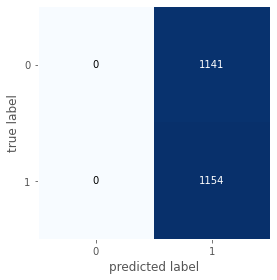

In [19]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Predicción del modelo, usando los datos de prueba
y_pred = logisticRegr.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat=matriz, figsize=(4,4), show_normed=False)
plt.tight_layout()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1141
           1       0.50      1.00      0.67      1154

    accuracy                           0.50      2295
   macro avg       0.25      0.50      0.33      2295
weighted avg       0.25      0.50      0.34      2295



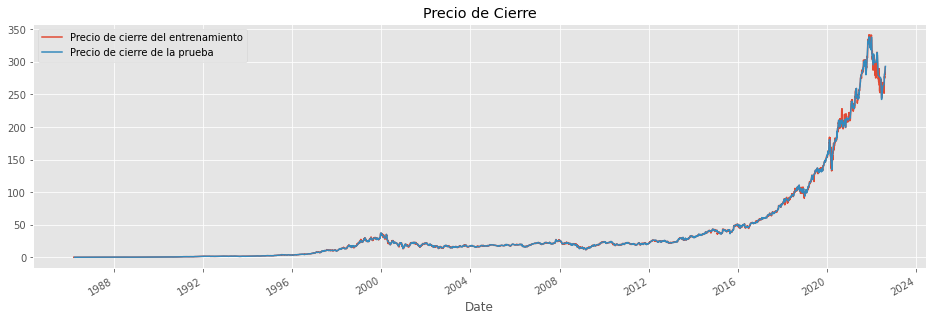

In [21]:
plt.figure(figsize=(16,5))
plt.title('Precio de Cierre')
X_train.Close.plot(label='Precio de cierre del entrenamiento')
X_test.Close.plot(label='Precio de cierre de la prueba')
plt.grid(True)
plt.legend()
plt.show()